# Palmer Archipelago (Antarctica) penguin data

![](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Leitura do Dataset

In [43]:
#Leitura do dataset
penguins = pd.read_csv("Datasets/penguins_size.csv")
#Observar algumas linhas do dataset
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploração dos dados

In [44]:
penguins.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

* **species**: espécies de pinguins
* **culmen_length_mm**: comprimento do *culmen* em milímetros
* **culmen_depth_mm**: comprimento do *culmen* em milímetros
* **flipper_length_mm**: comprimento da barbatana em milímetros
* **body_mass_g**: massa corporal em gramas
* **island**: nome da ilha no Arquipélago Palmer (Antártica)
* **sex**: sexo do pinguim

![](https://pbs.twimg.com/media/EaAXQn8U4AAoKUj?format=jpg&name=4096x4096)



In [45]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Nesta tabela podemos verificar que 3 dos colunas, *spicies*, *island* e *sex* tem objetos e as restantes floats.

Conseguimos também perceber que existem valores em falta no *dataframe*.

In [46]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


A tabela acima apresenta valores como o nº de entradas, média, desvio padrão, etc,das colunas com valores numéricos.

Analisando os valores da coluna *culmen_length_mm*, conclui-se que existem 342 entradas, que a média do comprimento dos bicos dos pinguins da amostra é ~43.92mm, tem um desvio médio de ~5.46mm, que o valor mínimo e máximo medidos são respetivamente, 32.1mm e 59.6mm. Assim como os valores dos percentis 25, 50 e 70. 


### Verificação da existência de valores em falta

In [47]:
#Verificar quais colunas têm valores em falta
penguins.isna().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

<AxesSubplot:>

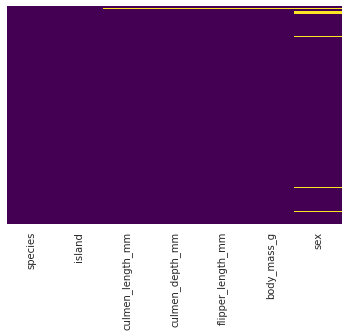

In [48]:
sns.heatmap(penguins.isnull(), yticklabels=False, cbar=False, cmap='viridis')

O gráfico acima permite visualisar onde existe dados em falta no *dataframe*.

In [49]:
#Verificar quantos valores em falta existem
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Podemos verificar que nas colunas *culmen_length_mm*, *culmen_depth_mm*, *flipper_length_mm*, *body_mass_g* têm 2 valores em falta, enquanto a coluna *sex* tem 10.

### Tratamento dos valores em falta

In [51]:
#Preencher os missing values com a média da espécie a que pertence

penguins['culmen_length_mm'] = penguins['culmen_length_mm'].fillna(penguins.groupby('species')['culmen_length_mm'].transform('mean'))

penguins['culmen_depth_mm'] = penguins['culmen_depth_mm'].fillna(penguins.groupby('species')['culmen_depth_mm'].transform('mean'))

penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(penguins.groupby('species')['flipper_length_mm'].transform('mean'))

penguins['body_mass_g'] = penguins['body_mass_g'].fillna(penguins.groupby('species')['body_mass_g'].transform('mean'))

penguins["sex"]=penguins["sex"].fillna(method='bfill')


Decidimos preencher os valores em falta das colunas numéricas com a média da espécie a que o pinguim pertence.

Para a coluna 'sex' utilizamos o método bfill para preencher os valores em falta.



Reparamos também que existia uma linha cujo valor na coluna 'sex' era ".", por isso alteramos esse valor para "MALE".

In [52]:
penguins.loc[penguins['sex'] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [53]:
#apagar a entrada que no atributo 'sex' tem "."
penguins.loc[penguins["sex"] == ".", ["sex"]] = "MALE"

In [54]:
penguins.loc[penguins["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [55]:
penguins.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [56]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,FEMALE
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,FEMALE


### Valores únicos

Verificação dos valores únicos para as *features* categóricas.

In [57]:
print(penguins['species'].unique())
print(penguins['island'].unique())
print(penguins['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


* Existem 3 espécies de pinguins: **Adelie**, **Chinstrap** e **Gentoo**
* Existem 2 ilhas no Arquipélago: **Torgersen**, **Biscoe** e **Dream**

### Groupby

In [58]:
penguins.groupby(by="species").mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


Na tabela acima podemos ver os valores médios, das 4 colunas com valores númericos, para cada espécie de pinguim.

In [59]:
penguins.groupby(by=['island','species']).mean()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
island    species                                                           
Biscoe    Adelie            38.975000        18.370455         188.795455   
          Gentoo            47.504878        14.982114         217.186992   
Dream     Adelie            38.501786        18.251786         189.732143   
          Chinstrap         48.833824        18.420588         195.823529   
Torgersen Adelie            38.947911        18.427815         191.172185   

                     body_mass_g  
island    species                 
Biscoe    Adelie     3709.659091  
          Gentoo     5076.016260  
Dream     Adelie     3688.392857  
          Chinstrap  3733.088235  
Torgersen Adelie     3706.262736

Verificamos que:
* a espécie Gentoo apenas existe na ilha Biscoe;
* a espécie Chinstrap apenas existe na ilha Dream;
* a espécie Adelie está presente em todas as ilhas.

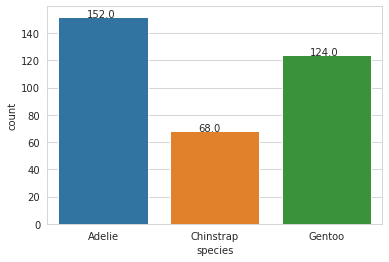

In [60]:
sns.set_style('whitegrid')
label = 'species'
ax = sns.countplot(x=label, data = penguins)
for p in ax.patches: ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Verificamos que existem muitos menos pinguins Chinstrap do que pinguins das outras espécies

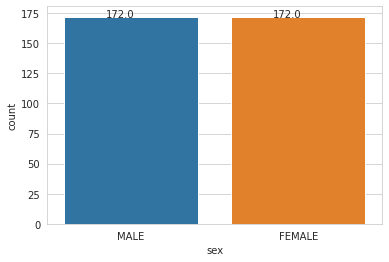

In [61]:
sns.set_style('whitegrid')
label = 'sex'
ax = sns.countplot(x=label, data = penguins)
for p in ax.patches: ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Verificamos que a quantidade de pinguins do sexo masculino e feminimo está equilibrada.

## Distribuição estatística

* ### culmen_length_mm

<AxesSubplot:xlabel='culmen_length_mm', ylabel='Count'>

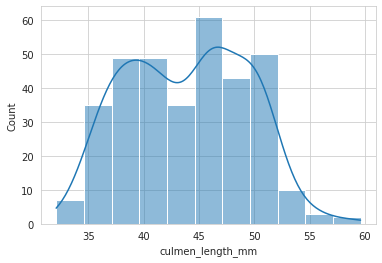

In [62]:
sns.histplot(penguins['culmen_length_mm'], kde=True)

In [63]:
print("Skewness: %f" % penguins['culmen_length_mm'].skew())
print("Kurtosis: %f" % penguins['culmen_length_mm'].kurt())

Skewness: 0.053845
Kurtosis: -0.876996


* ### culmen_depth_mm

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='Count'>

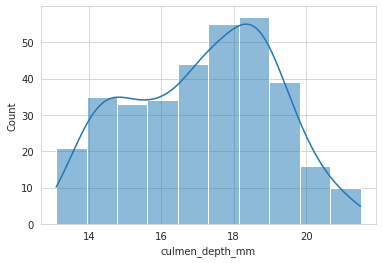

In [22]:
sns.histplot(penguins['culmen_depth_mm'], kde=True)

In [24]:
print("Skewness: %f" % penguins['culmen_depth_mm'].skew())
print("Kurtosis: %f" % penguins['culmen_depth_mm'].kurt())

Skewness: -0.143465
Kurtosis: -0.906866


* ### flipper_length_mm

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

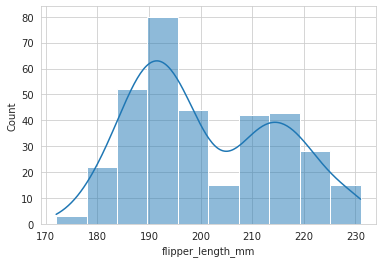

In [23]:
sns.histplot(penguins['flipper_length_mm'], kde=True)

In [24]:
print("Skewness: %f" % penguins['flipper_length_mm'].skew())
print("Kurtosis: %f" % penguins['flipper_length_mm'].kurt())

Skewness: 0.343578
Kurtosis: -0.990714


* ### body_mass_g

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

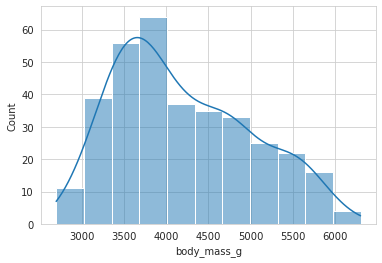

In [26]:
sns.histplot(penguins['body_mass_g'], kde=True)

In [27]:
print("Skewness: %f" % penguins['body_mass_g'].skew())
print("Kurtosis: %f" % penguins['body_mass_g'].kurt())

Skewness: 0.470329
Kurtosis: -0.719222


## Outliers

* ### culmen_length_mm

<AxesSubplot:xlabel='culmen_length_mm'>

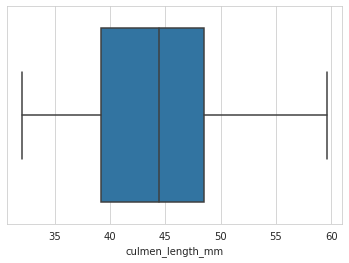

In [30]:
sns.boxplot(x=penguins['culmen_length_mm'])

<AxesSubplot:xlabel='culmen_length_mm', ylabel='species'>

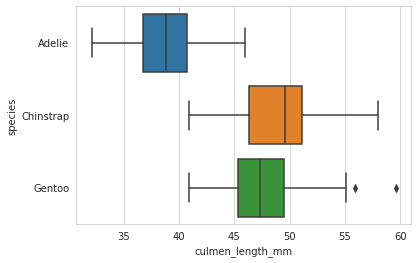

In [31]:
sns.boxplot(x=penguins['culmen_length_mm'], y=penguins["species"])

Apesar de na *boxplot* da *culmen_length_mm* global não existirem outliers, verificamos que, fazendo um *boxplot* desta *feature* para cada espécie, **existe um outlier nos pinguins da espécie Gentoo**.

* ### culmen_depth_mm

<AxesSubplot:xlabel='culmen_depth_mm'>

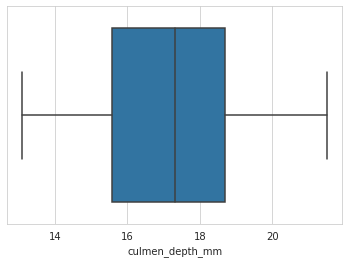

In [32]:
sns.boxplot(x=penguins['culmen_depth_mm'])

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='species'>

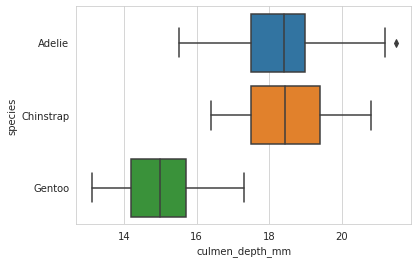

In [33]:
sns.boxplot(x=penguins['culmen_depth_mm'], y=penguins['species'])

Apesar de na *boxplot* da *culmen_depth_mm* global não existirem outliers, verificamos que, fazendo um *boxplot* desta *feature* para cada espécie, **existe um outlier nos pinguins da espécie Adelie**.

* ### flipper_length_mm

<AxesSubplot:xlabel='flipper_length_mm'>

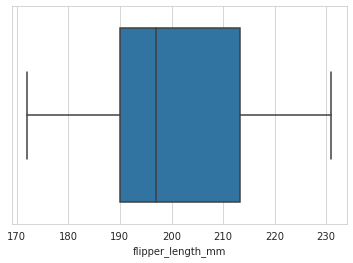

In [34]:
sns.boxplot(x=penguins['flipper_length_mm'])

<AxesSubplot:xlabel='flipper_length_mm', ylabel='species'>

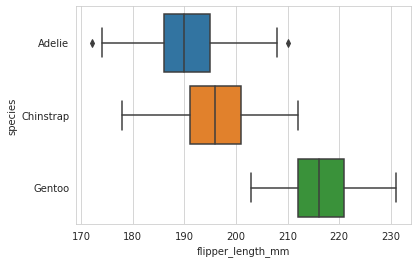

In [35]:
sns.boxplot(x=penguins['flipper_length_mm'], y=penguins['species'])

Apesar de na *boxplot* da *flipper_length_mm* global não existirem outliers, verificamos que, fazendo um *boxplot* desta *feature* para cada espécie, **existem dois outliers nos pinguins da espécie Adelie**.

* ### body_mass_g

<AxesSubplot:xlabel='body_mass_g'>

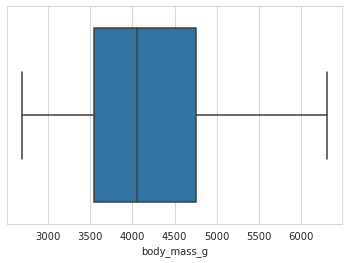

In [36]:
sns.boxplot(x=penguins['body_mass_g'])

<AxesSubplot:xlabel='body_mass_g', ylabel='species'>

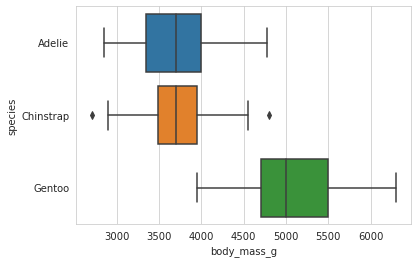

In [37]:
sns.boxplot(x=penguins['body_mass_g'], y=penguins['species'])

Apesar de na *boxplot* da *body_mass_g* global não existirem outliers, verificamos que, fazendo um *boxplot* desta *feature* para cada espécie, **existem dois outliers nos pinguins da espécie Chinstrap**.

### Scatter plots

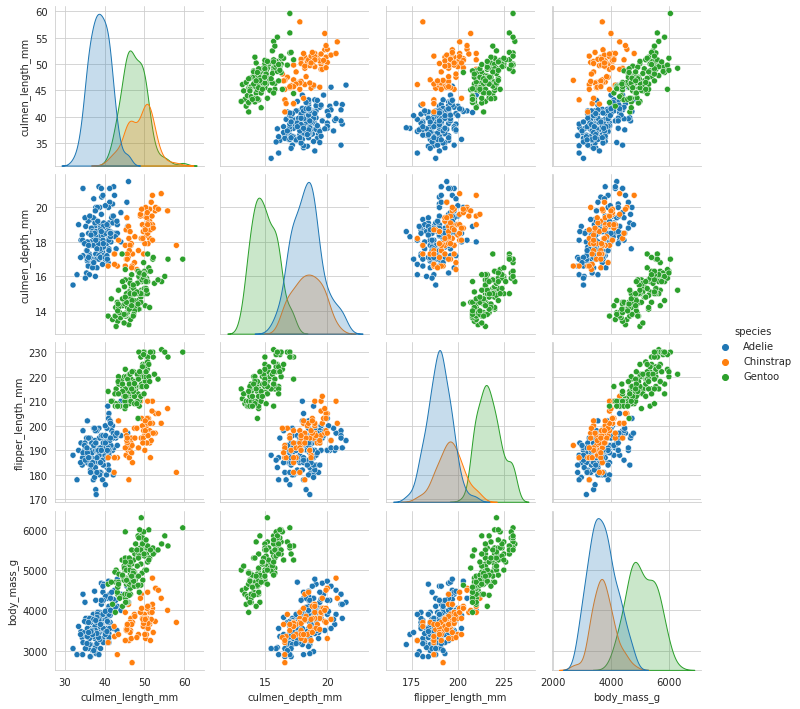

In [38]:
sns.pairplot(penguins, hue='species')

Nalguns dos gráficos, como por exemplo no que **x='culmen_depth_mm' e y='body_mass_g'**, vemos que **os valores das espécies Adelie e Chinstrap são muito semelhantes**.

No entanto existem gráficos, como o em que **x='culmen_length_mm' e y='body_mass_g'**, em que verificamos que **existe alguma distinção dos valores para as várias espécies de pinguins**.

### Matriz de correlação

<AxesSubplot:>

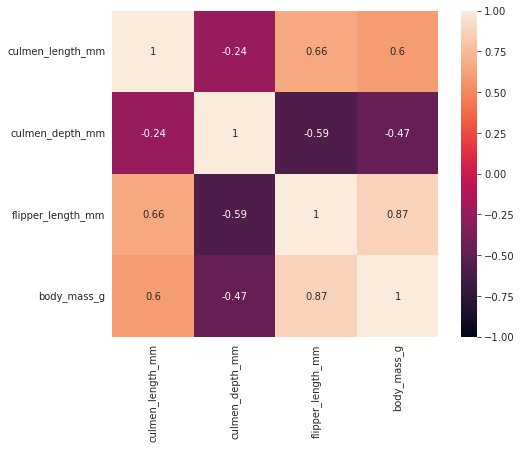

In [39]:
corr_matrix = penguins.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,square=True,annot=True)

Como podemos ver analisando a matriz de correlação, **existem 2 atributos, 'flipper_length_mm' e 'body_mass_g', que apresentam correlação elevada.** Ou seja, com o aumento da massa corporal do pinguim, observa-se que o comprimento das suas *flippers*

## Preparação dos dados

### Transformação dos dados categóricos

In [40]:
penguins['island'].replace({'Biscoe':0, 'Dream': 1, 'Torgersen':2}, inplace=True)
penguins['species'].replace({'Adelie':0, 'Chinstrap': 1, 'Gentoo':2}, inplace=True)
penguins['sex'].replace({'MALE':0, 'FEMALE': 1}, inplace=True)
penguins.rename(columns={'sex':'female'}, inplace=True)

penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,female
0,0,2,39.100000,18.700000,181.000000,3750.0,0
1,0,2,39.500000,17.400000,186.000000,3800.0,1
2,0,2,40.300000,18.000000,195.000000,3250.0,1
3,0,2,38.791391,18.346358,189.953642,NaN,1
4,0,2,36.700000,19.300000,193.000000,3450.0,1
